# xiaolei.chain document

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from corrLib import readseq

## avg_cos(traj, order_pNo)
Calculate average cos's of adjacent particles (of a chain of particles) for a trajectory.
* traj: trajectory, a pd.DataFrame that contains columns (x, y, particle, frame)
* order_pNo: particle numbers in order, should be a list-like array

Returns:
* A pd.DataFrame containing columns (frame, cos)

In [3]:
from xiaolei.chain.characterize import avg_cos

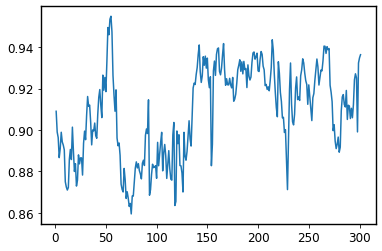

In [4]:
traj = pd.read_csv(r'I:\Github\Python\mylib\xiaolei\chain\test_files\data.csv')
order_pNo = [0, 13, 12, 11, 9, 8, 6, 7, 1, 2, 4, 3, 5, 14, 10]
df = avg_cos(traj, order_pNo)
plt.plot(df.frame, df.cos)

## dt_track(folder)
Track chain partciles using masking and distance transform.
* folder: a folder directory containing an image sequence with extension _.tif_

Returns:
* A pandas.DataFrame containing columns (x, y, Name), Name is the name of corresponding images

In [5]:
from xiaolei.chain.tracking import dt_track

In [6]:
folder = r'I:\Github\Python\mylib\xiaolei\chain\test_files'
traj = dt_track(folder)
traj.head()

,x,y,Name
0,194,70,00000
1,355,79,00000
2,226,83,00000
3,325,96,00000
4,386,96,00000


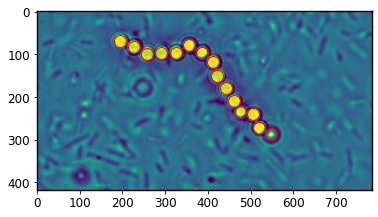

In [9]:
# Visualize the tracking result
l = readseq(folder)
for num, i in l.iterrows():
    img = io.imread(i.Dir)
    plt.imshow(img)
    plt.plot(traj.x, traj.y, marker='o', markersize=12, ls='', mec='red', mfc=(0,0,0,0))